[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/juansensio/blog/blob/master/096_ml_unsupervised/096_ml_unsupervised.ipynb)

# ML - Aprendizaje No Supervisado

Si bien todos los ejemplos de *Machine Learning* que hemos visto hasta ahora en esta serie se han basado en aprendizaje supervisado (nuestros datos van acompañados de las etiquetas correspondientes, ejemplos de la tarea que queremos llevar a cabo) la mayoría de los datos no están etiquetados. Antes esta problemática tenemos dos alternativas: etiquetar datos manualmente (lo cual require de tiempo, esfuerzo y dinero en el caso de querer desarrollar sistemas reales) o bien usar técnicas de aprendizaje no supervisado, o *Unsupervised Learning* en inglés.

## Clustering

De entre las diferentes técnicas de aprendizaje no supervisado, el *Clustering* es una de las más usadas. Este técnica consiste en identificar aquellas muestras similares del conjunto de datos y asignarlas a un *cluster*, o grupo. Esto permite aplicaciones tales como: segmentación de clientes, análisis de datos, reducción de la dimensionalidad, detección de anomalías, aprendizaje semi-supervisado, motores de búsqueda e incluso la semgentación de imágenes.

### K-Means

El algoritmo de *K-Means* es uno de los más usados a la hora de aplicar *Clustering*, ya que es un método rápido y eficiente. Vamos a generar un conjunto de datos sintético para aprender a usar esta técnica.

In [92]:
# CARGA DE DATOS - DATASET ISOLET
# Dataset de reconocimiento de letras habladas (A-Z = 26 clases reales)
import pandas as pd
import numpy as np

# Cargar dataset ISOLET (Isolated Letter Speech Recognition)
# 617 características acústicas por cada letra pronunciada
data = pd.read_csv('../Dataset/ISOLET.csv', header=None)
X = data.values  # Matriz de características (sin etiquetas)

print("INFORMACIÓN DEL DATASET:")
print(f"Forma del dataset: {X.shape}")
print(f"Número de muestras: {X.shape[0]}")
print(f"Número de características: {X.shape[1]} (características acústicas)")
print(f"Rango de valores: [{X.min():.3f}, {X.max():.3f}]")
print("Nota: Este dataset tiene 26 clases reales (letras A-Z)")

INFORMACIÓN DEL DATASET:
Forma del dataset: (7797, 617)
Número de muestras: 7797
Número de características: 617 (características acústicas)
Rango de valores: [-1.000, 1.000]
Nota: Este dataset tiene 26 clases reales (letras A-Z)


In [ ]:
# REDUCCIÓN DE DIMENSIONALIDAD PARA VISUALIZACIÓN
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# PCA: Reducir de 617 dimensiones a 2D para poder graficar
print("Aplicando PCA para visualización...")
pca = PCA(n_components=2, random_state=42)
X_2d = pca.fit_transform(X)
print(f"Datos reducidos a 2D: {X_2d.shape}")

# FUNCIÓN DE VISUALIZACIÓN
def plot_clusters(X, y=None):

    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

Aplicando PCA para visualización...
Datos reducidos a 2D: (7797, 2)
Datos reducidos a 2D: (7797, 2)


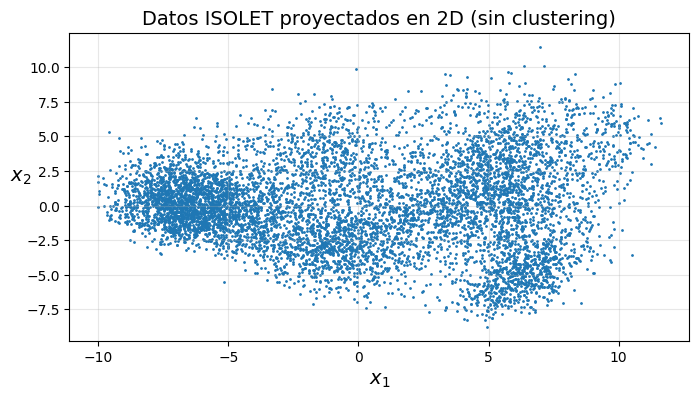

Los puntos están sin etiquetar - necesitamos clustering para agruparlos


In [94]:
# VISUALIZACIÓN INICIAL DE LOS DATOS (SIN CLUSTERING)
plt.figure(figsize=(8, 4))
plot_clusters(X_2d)
plt.title("Datos ISOLET proyectados en 2D (sin clustering)", fontsize=14)
plt.grid(True, alpha=0.3)
plt.show()
print("Los puntos están sin etiquetar - necesitamos clustering para agruparlos")

En *Scikit-Learn* puedes usar el objeto [KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html), indicando el número de clusters deseado.  

In [120]:
# APLICANDO K-MEANS CLUSTERING
from sklearn.cluster import KMeans

# Probando con k=50 clusters (más de lo necesario)
k = 30
print(f"Aplicando K-Means con k={k} clusters...")
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)  # Entrenar y predecir clusters
print(f"Clustering completado. Etiquetas generadas: {len(np.unique(y_pred))} clusters")
y_pred  # Ver las etiquetas asignadas

Aplicando K-Means con k=30 clusters...
Clustering completado. Etiquetas generadas: 30 clusters
Clustering completado. Etiquetas generadas: 30 clusters


array([ 6, 28, 15, ..., 19, 10, 10])

In [121]:
# CENTROIDES DEL CLUSTERING
# Los centroides representan el "centro" de cada cluster
print("Centroides de los clusters (en 617 dimensiones):")
print(f"Forma de centroides: {kmeans.cluster_centers_.shape}")
print("Cada fila es un centroide, cada columna es una característica acústica")
kmeans.cluster_centers_

Centroides de los clusters (en 617 dimensiones):
Forma de centroides: (30, 617)
Cada fila es un centroide, cada columna es una característica acústica


array([[-0.32093241,  0.33750759,  0.5774469 , ...,  0.1181269 ,
         0.02545379, -0.33135586],
       [-0.3582263 ,  0.21942691,  0.4525052 , ...,  0.03760979,
        -0.07301101, -0.42378104],
       [-0.50578978, -0.06540219,  0.13681971, ...,  0.14736788,
         0.02570949, -0.34940876],
       ...,
       [-0.52309793, -0.10521103,  0.29621241, ...,  0.43128276,
         0.32869241, -0.00228828],
       [-0.47523707,  0.02880585,  0.24886244, ...,  0.10804683,
        -0.00416488, -0.34101561],
       [-0.46335789,  0.02806711,  0.309075  , ...,  0.56838026,
         0.44148158,  0.13306842]])

In [122]:
# PREDICCIÓN EN DATOS NUEVOS
# Creamos datos sintéticos para probar la predicción
X_new = np.random.uniform(-1.0, 1.0, (4, 617))
predictions = kmeans.predict(X_new)
print("Predicciones para 4 muestras nuevas:")
print(f"Clusters asignados: {predictions}")
print("El modelo asigna cada muestra nueva al cluster más cercano")
predictions

Predicciones para 4 muestras nuevas:
Clusters asignados: [16 16 16 16]
El modelo asigna cada muestra nueva al cluster más cercano


array([16, 16, 16, 16])

In [124]:
# FUNCIONES DE VISUALIZACIÓN AVANZADA

def plot_data(X):
    """Graficar puntos de datos como puntos negros"""
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    """
    Graficar centroides con círculos y cruces
    - Circle_color: color del círculo exterior
    - Cross_color: color de la cruz interior
    """
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=10, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=10,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=100, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    """
    Graficar fronteras de decisión del clustering
    - Muestra las regiones de cada cluster con colores
    - Opcionalmente muestra centroides y etiquetas
    """
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

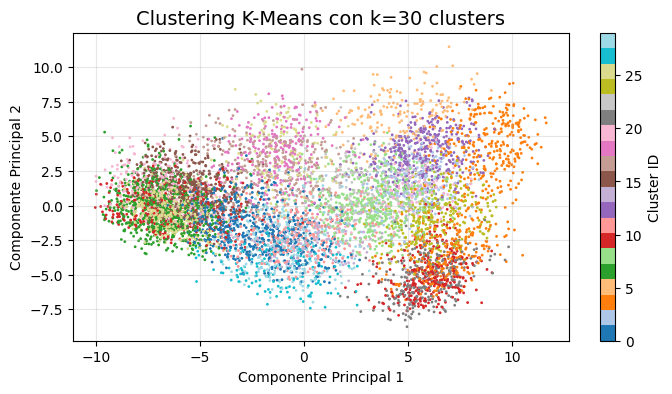

Resultado: 30 clusters diferentes


In [125]:
# VISUALIZACIÓN DE CLUSTERS COLOREADOS
labels = kmeans.predict(X)
plt.figure(figsize=(8,4))
plt.scatter(X_2d[:,0], X_2d[:,1], c=labels, s=1, cmap='tab20')
plt.title(f"Clustering K-Means con k={k} clusters", fontsize=14)
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.colorbar(label='Cluster ID')
plt.grid(True, alpha=0.3)
plt.show()
print(f"Resultado: {len(np.unique(labels))} clusters diferentes")


En lugar de asignar un grupo a cada muestra (*hard clustering*) se le puede asignar una puntuación (*soft clustering*) en función de su distancia al centroide.

In [126]:
# SOFT CLUSTERING - DISTANCIAS A CENTROIDES
# En lugar de asignar una etiqueta fija, muestra qué tan cerca está de cada cluster
distances = kmeans.transform(X_new)
print("Distancias de muestras nuevas a todos los centroides:")
print(f"Forma: {distances.shape} (4 muestras × {k} centroides)")
print("Valores más bajos = más cerca del centroide")
distances

Distancias de muestras nuevas a todos los centroides:
Forma: (4, 30) (4 muestras × 30 centroides)
Valores más bajos = más cerca del centroide


array([[19.10256485, 19.63645282, 19.55173692, 19.24205361, 19.51288252,
        19.62130056, 19.17959686, 19.28045033, 19.29735904, 20.04958269,
        18.57783582, 19.05069558, 19.29614634, 19.2239399 , 19.47817452,
        19.31954584, 17.36268836, 18.83043462, 18.84977777, 19.57782672,
        18.78137873, 19.77743944, 19.13232013, 19.2616271 , 19.4062451 ,
        19.62887884, 18.75574939, 19.1240497 , 19.74956638, 19.60682611],
       [19.13363658, 19.39313472, 19.22681631, 19.11731312, 19.3003056 ,
        19.40363675, 19.50275195, 19.57477405, 18.84859494, 19.44793503,
        19.31753118, 19.08442835, 18.98453052, 19.06729737, 19.31901574,
        19.3882859 , 17.50980538, 18.78057814, 18.67285053, 19.07237252,
        19.24248388, 19.32461986, 18.88700925, 19.18201043, 19.16941703,
        19.74775603, 18.68197925, 18.89442379, 19.43646968, 19.16898892],
       [20.16639918, 20.69329783, 20.25509488, 19.8860218 , 19.82342623,
        19.78976379, 20.62407366, 20.8116142 , 19

Este algoritmo funciona asignando centroides de manera aleatoria y, de manera iterativa, asigna cada instancia a uno de ellos (el más cercano) tras lo cual se recalcula el centroide como el valor promedio de todas las instancias asignadas al grupo.

In [127]:
# kmeans_iter1 = KMeans(n_clusters=5, init="random", n_init=1,
                    #  algorithm="full", max_iter=1, random_state=1)
# kmeans_iter1 = KMeans(n_clusters=5, init="random", n_init=1,
                    #  algorithm="lloyd", max_iter=1, random_state=1)
# kmeans_iter1 = KMeans(n_clusters=5, init="random", n_init=5,
                    #  algorithm="elkan", max_iter=1, random_state=1)
# Configuración del modelo K-Means con inicialización inteligente
kmeans_iter1 = KMeans(n_clusters=30, init="k-means++", n_init=1,
                      algorithm="elkan", max_iter=3, random_state=4)
# kmeans_iter2 = KMeans(n_clusters=26, init="random", n_init=1,
#                      algorithm="full", max_iter=2, random_state=1)
# kmeans_iter2 = KMeans(n_clusters=26, init="random", n_init=5,
#                      algorithm="elkan", max_iter=2, random_state=1)
kmeans_iter2 = KMeans(n_clusters=30, init="k-means++", n_init=1,
                     algorithm="elkan", max_iter=2, random_state=1)

# kmeans_iter3 = KMeans(n_clusters=26, init="random", n_init=1,
#                      algorithm="full", max_iter=3, random_state=1)
# kmeans_iter3 = KMeans(n_clusters=26, init="random", n_init=5,
#                      algorithm="elkan", max_iter=3, random_state=1)
kmeans_iter3 = KMeans(n_clusters=30, init="k-means++", n_init=1,
                     algorithm="elkan", max_iter=3, random_state=5)
kmeans_iter1.fit(X)
kmeans_iter2.fit(X)
kmeans_iter3.fit(X)

KMeans(algorithm='elkan', max_iter=3, n_clusters=30, n_init=1, random_state=5)

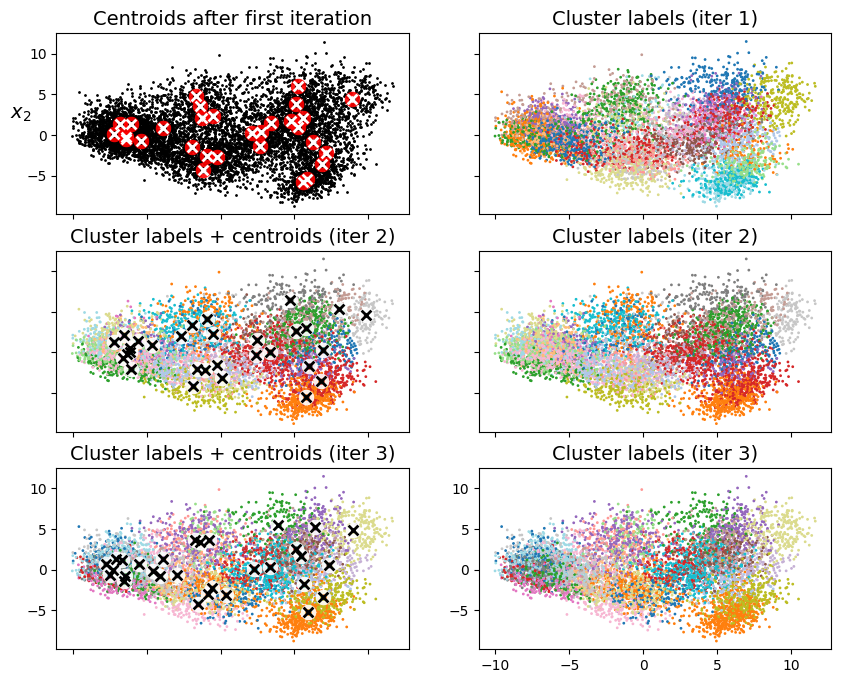

In [129]:
plt.figure(figsize=(10, 8))

plt.subplot(321)
plot_data(X_2d)
# Centroides proyectados a 2D con PCA
plot_centroids(pca.transform(kmeans_iter1.cluster_centers_), circle_color='r', cross_color='w')
plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.tick_params(labelbottom=False)
plt.title("Centroids after first iteration", fontsize=14)

plt.subplot(322)
labels = kmeans_iter1.predict(X)  # predicción en 617D
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=labels, s=1, cmap='tab20')
plt.title("Cluster labels (iter 1)", fontsize=14)
plt.tick_params(labelleft=False, labelbottom=False)

plt.subplot(323)
labels = kmeans_iter2.predict(X)
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=labels, s=1, cmap='tab20')
plot_centroids(pca.transform(kmeans_iter2.cluster_centers_))
plt.title("Cluster labels + centroids (iter 2)", fontsize=14)
plt.tick_params(labelleft=False, labelbottom=False)

plt.subplot(324)
labels = kmeans_iter2.predict(X)
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=labels, s=1, cmap='tab20')
plt.title("Cluster labels (iter 2)", fontsize=14)
plt.tick_params(labelleft=False, labelbottom=False)

plt.subplot(325)
labels = kmeans_iter3.predict(X)
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=labels, s=1, cmap='tab20')
plot_centroids(pca.transform(kmeans_iter3.cluster_centers_))
plt.title("Cluster labels + centroids (iter 3)", fontsize=14)
plt.tick_params(labelbottom=False)

plt.subplot(326)
labels = kmeans_iter3.predict(X)
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=labels, s=1, cmap='tab20')
plt.title("Cluster labels (iter 3)", fontsize=14)
plt.show()


Esto implica que en función del estado inicial, el algoritmo puede llegar a una solución u otra.

In [131]:
def plot_clusterer_comparison(clusterer1, clusterer2, X, title1=None, title2=None):
    clusterer1.fit(X)
    clusterer2.fit(X)

    plt.figure(figsize=(10, 3.2))

    plt.subplot(121)
    plot_decision_boundaries(clusterer1, X)
    if title1:
        plt.title(title1, fontsize=14)

    plt.subplot(122)
    plot_decision_boundaries(clusterer2, X, show_ylabels=False)
    if title2:
        plt.title(title2, fontsize=14)

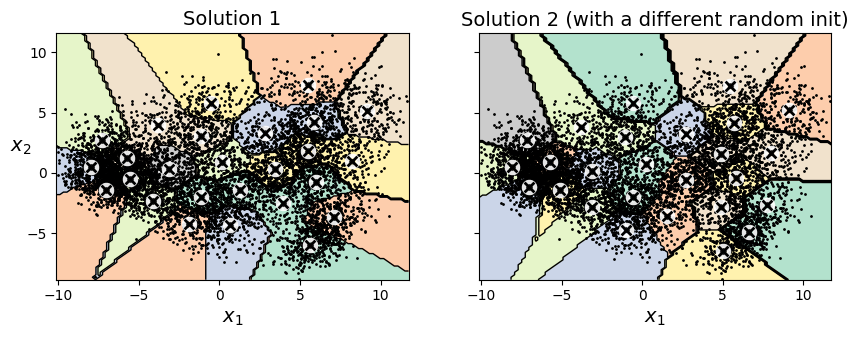

In [132]:
kmeans_rnd_init1 = KMeans(n_clusters=26, init="random", n_init=1,
                         algorithm="elkan", random_state=11)
kmeans_rnd_init2 = KMeans(n_clusters=26, init="random", n_init=1,
                         algorithm="elkan", random_state=19)

plot_clusterer_comparison(kmeans_rnd_init1, kmeans_rnd_init2, X_2d,"Solution 1", "Solution 2 (with a different random init)")

plt.show()

Para minimizar el impacto de la inicialización tenemos varias alternativas: probar varias y quedarnos con la mejor, o usar la inicialización inteligente que ofrece *Scikit-Learn* por defecto.

In [133]:
kmeans_rnd_10_inits = KMeans(n_clusters=26, init="random", n_init=10,
                              algorithm="elkan", random_state=11)
kmeans_rnd_10_inits.fit(X)

KMeans(algorithm='elkan', init='random', n_clusters=26, n_init=10,
       random_state=11)

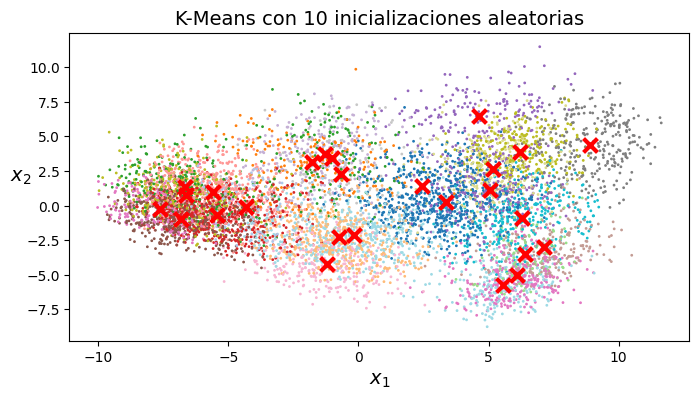

In [134]:
# Visualizar los resultados del clustering
labels = kmeans_rnd_10_inits.predict(X)
plt.figure(figsize=(8, 4))
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=labels, s=1, cmap='tab20')
plt.scatter(pca.transform(kmeans_rnd_10_inits.cluster_centers_)[:, 0], 
           pca.transform(kmeans_rnd_10_inits.cluster_centers_)[:, 1], 
           c='red', marker='x', s=100, linewidth=3)
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.title("K-Means con 10 inicializaciones aleatorias", fontsize=14)
plt.show()

Otras mejoras al algoritmo de *K-Means* incluyen: *K-Means* acelerados (usado por *Scikit-Learn* por defecto y que evita algunos cálculos de distancias) y *mini-batch K-Means* (que puedes usarse si el dataset es tan grande que no cabe en memoria). Vamos a ver un ejemplo de este último caso con el dataset MNIST, para lo cual usaremos el objeto [MiniBatchKMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.MiniBatchKMeans.html?highlight=minibatchkmeans#sklearn.cluster.MiniBatchKMeans).

In [135]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1)
mnist.target = mnist.target.astype(np.int64)

In [136]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    mnist["data"], mnist["target"], random_state=42)

In [137]:
def load_next_batch(batch_size):
    return X[np.random.choice(len(X), batch_size, replace=False)]

In [144]:
from sklearn.cluster import MiniBatchKMeans

k = 30
n_init = 10
n_iterations = 80
batch_size = 200
init_size = 1000
evaluate_on_last_n_iters = 10

best_kmeans = None

for init in range(n_init):
    minibatch_kmeans = MiniBatchKMeans(n_clusters=k, init_size=init_size)
    X_init = load_next_batch(init_size)
    minibatch_kmeans.partial_fit(X_init)

    minibatch_kmeans.sum_inertia_ = 0
    for iteration in range(n_iterations):
        X_batch = load_next_batch(batch_size)
        minibatch_kmeans.partial_fit(X_batch)
        if iteration >= n_iterations - evaluate_on_last_n_iters:
            minibatch_kmeans.sum_inertia_ += minibatch_kmeans.inertia_

    if (best_kmeans is None or
        minibatch_kmeans.sum_inertia_ < best_kmeans.sum_inertia_):
        best_kmeans = minibatch_kmeans

In [145]:
best_kmeans.score(X)

-433518.0468948728

El algoritmo de *mini-batch K-Means* es más rápido que *K-Means* normal, pero su precisión suele ser peor.

### Encontrando el número óptimo de grupos

Como hemos visto anteriormente, el número de grupos o *clusters* es un hyperparámetro del modelo que debemos definir, y como podrás imaginar si nuestros datos no están etiquetados no será imposible saber qué valor usar. Para ello la solución se basa en usar diferentes valores y utilizar alguna métrica significativa. Una de estas métricas se conoce como el *silhouette score*, que se basa en calcular el coeficiente de silueta (*silhouette coefficient*) de todas las muestras del dataset como $(b-a)/\mathrm{max}(a,b)$ donde $a$ es la distancia mínima al resto de muestras del mismo grupo y $b$ es la distancia media de los grupos más cercanos. Su valor se encuentra entre $1$ y $-1$. Un valor cercano a $1$ indica que la muestra está bien metida en su grupo y lejos de los demás mientras que un valor cercano a $0$ indica que la muestra se encuentra cerca de una frontera de decisión y un valor cercano a $-1$ indica que la muestra está en el grupo incorrecto.

In [146]:
# MÉTRICA SILHOUETTE SCORE
# Evalúa qué tan bien están separados los clusters
from sklearn.metrics import silhouette_score
score = silhouette_score(X, kmeans.labels_)
print(f"Silhouette Score con k={k}: {score:.3f}")

Silhouette Score con k=30: 0.084


Calculando la métrica para diferentes números de *clusters* podemos encontrar el valor óptimo.

Probando diferentes valores de k para encontrar el óptimo...
Evaluando k desde 2 hasta 35 clusters...
Evaluación completada!
Mejor k encontrado: 2 con score: 0.178
Evaluación completada!
Mejor k encontrado: 2 con score: 0.178


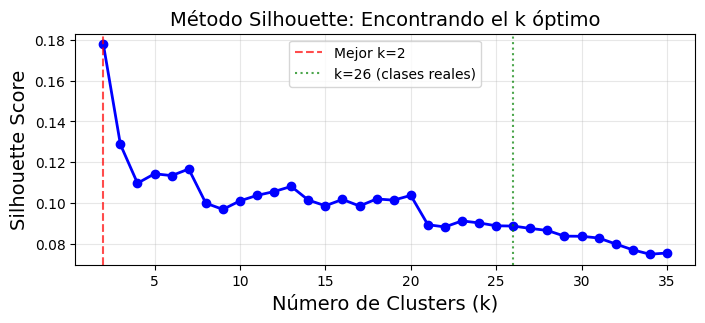

In [118]:
# BÚSQUEDA DEL NÚMERO ÓPTIMO DE CLUSTERS
print("Probando diferentes valores de k para encontrar el óptimo...")

max_k = 35  # Hasta 35 clusters (analizamos alrededor de las 26 letras reales)
print(f"Evaluando k desde 2 hasta {max_k} clusters...")

# Entrenar K-Means para cada valor de k
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X) for k in range(2, max_k + 1)]
silhouette_scores = [silhouette_score(X, model.labels_) for model in kmeans_per_k]

# Generar eje x para k de 2 hasta max_k
ks = list(range(2, max_k + 1))

# Encontrar el mejor k
best_idx = np.argmax(silhouette_scores)
best_k = ks[best_idx]
best_score = silhouette_scores[best_idx]

print(f"Evaluación completada!")
print(f"Mejor k encontrado: {best_k} con score: {best_score:.3f}")

# GRÁFICA DEL MÉTODO SILHOUETTE
plt.figure(figsize=(8, 3))
plt.plot(ks, silhouette_scores, "bo-", linewidth=2)
plt.axvline(x=best_k, color='red', linestyle='--', alpha=0.7, label=f'Mejor k={best_k}')
plt.axvline(x=26, color='green', linestyle=':', alpha=0.7, label='k=26 (clases reales)')
plt.xlabel("Número de Clusters (k)", fontsize=14)
plt.ylabel("Silhouette Score", fontsize=14)
plt.title("Método Silhouette: Encontrando el k óptimo", fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

También es muy útil visualizar los diagramas de silueta, en el que visualizaremos todos los coeficientes de silueta ordenados por grupos y su valor.

Creando diagramas de silhouette para valores clave de k...
Analizando k = [20, 24, 26, 30]


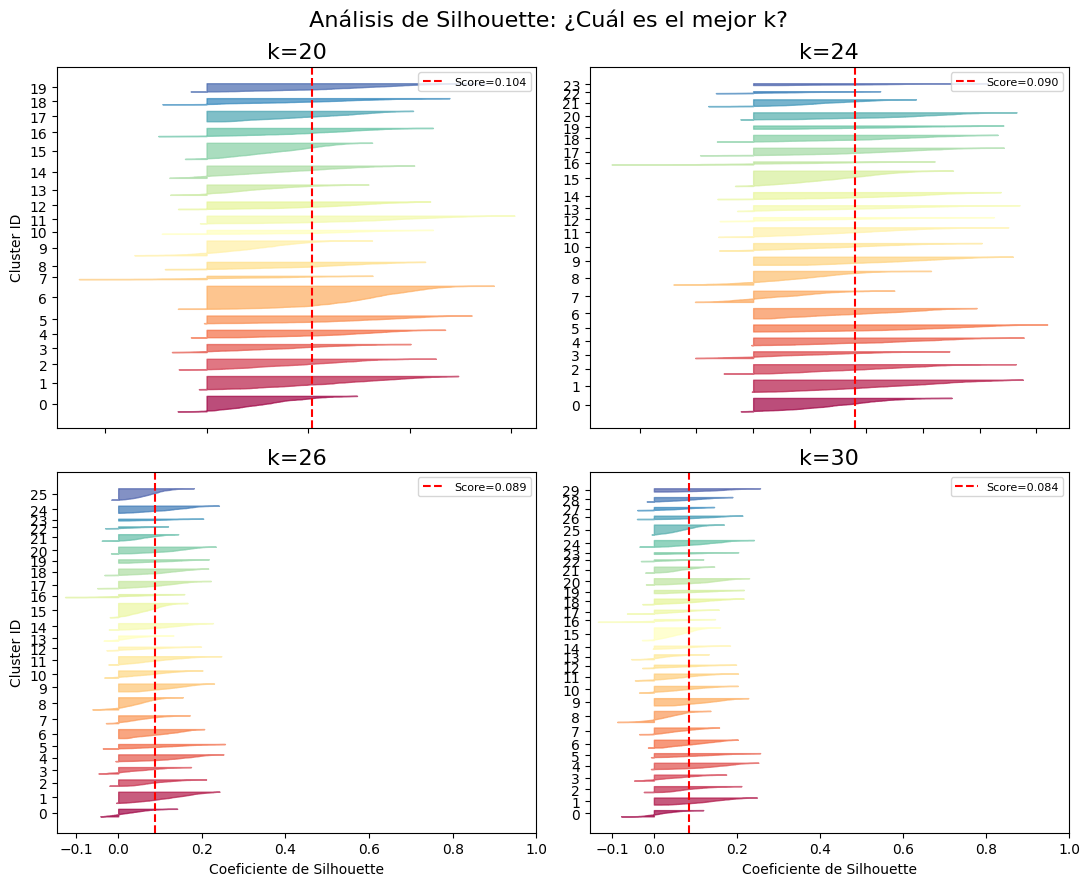

 Interpretación:
- Barras anchas = clusters grandes
- Barras que cruzan 0 = muestras mal asignadas
- Línea roja = promedio del silhouette score
- k=26 corresponde a las 26 letras reales del dataset


In [119]:
# DIAGRAMAS DE SILHOUETTE DETALLADOS
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter
import matplotlib as mpl

print("Creando diagramas de silhouette para valores clave de k...")

plt.figure(figsize=(11, 9))

# Valores estratégicos alrededor de las 26 letras reales
valid_ks = [k for k in (20, 24, 26, 30) if k <= len(kmeans_per_k)]  
print(f"Analizando k = {valid_ks}")

for plot_idx, k in enumerate(valid_ks):
    plt.subplot(2, 2, plot_idx + 1)

    # Obtener etiquetas y coeficientes de silhouette para cada muestra
    y_pred = kmeans_per_k[k - 2].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []
    
    # Dibujar cada cluster
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()  # Ordenar coeficientes de menor a mayor

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    # Configurar ejes y etiquetas
    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    
    if k in (20, 26):
        plt.ylabel("Cluster ID")

    if k in (26, 30):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Coeficiente de Silhouette")
    else:
        plt.tick_params(labelbottom=False)

    # Línea roja = promedio general del silhouette score
    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--", 
                label=f'Score={silhouette_scores[k - 2]:.3f}')
    
    # Títulos informativos
    if k == 26:
        plt.title(f"k={k}", fontsize=16)
    else:
        plt.title(f"k={k}", fontsize=16)
    
    plt.legend(loc='upper right', fontsize=8)

plt.suptitle(" Análisis de Silhouette: ¿Cuál es el mejor k?", fontsize=16)
plt.tight_layout()
plt.show()

print(" Interpretación:")
print("- Barras anchas = clusters grandes")
print("- Barras que cruzan 0 = muestras mal asignadas") 
print("- Línea roja = promedio del silhouette score")
print("- k=26 corresponde a las 26 letras reales del dataset")